<a href="https://colab.research.google.com/github/GuilhermeOrtega/GuilhermeOrtega/blob/main/Regressao_linear_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# **Passos da Análise:**
# 1.  **Configuração:** Importar as bibliotecas necessárias.
# 2.  **Carregamento e Análise Exploratória (EDA):** Carregar e investigar os dados para entender suas características.
# 3.  **Visualização:** Analisar a relação entre a área do imóvel e seu preço de venda.
# 4.  **Construção do Modelo:** Treinar um modelo de Regressão Linear Simples.
# 5.  **Interpretação e Avaliação:** Entender o que o modelo aprendeu e medir sua performance.
# 6.  **Análise Crítica:** Investigar os erros (resíduos) para validar o modelo.
# 7.  **Modelo com 2 variáveis:** Melhorar o modelo

In [2]:
# --- Passo 1: Configuração ---
# Importando as bibliotecas que vamos utilizar na nossa análise

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Configurando o estilo e tamanho dos gráficos para uma melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
# ### Passo 2: Carregamento e Análise Exploratória de Dados (EDA)

In [5]:
df = pd.read_csv('Casas.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
1255,1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500
1256,1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500
1257,1258,30,RL,56.0,4060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,99900


In [ ]:
# Para nossa análise de Regressão Linear Simples, vamos focar em duas variáveis:
# GrLivArea: Área útil do imóvel (em pés quadrados). Nossa variável explicativa (X).
# SalePrice: Preço de venda do imóvel (em dólares). Nossa variável alvo (y).
df_analise = df[['GrLivArea', 'SalePrice']].copy()

In [ ]:
# Verificando a estrutura e os tipos de dados
print("\nInformações do DataFrame:")
df_analise.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1259 non-null   int64
 1   SalePrice  1259 non-null   int64
dtypes: int64(2)
memory usage: 19.8 KB


In [ ]:
df_analise.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [ ]:
df_analise.describe()

,GrLivArea,SalePrice
count,1259.000000,1259.000000
mean,1507.630659,181144.812550
std,513.865812,80588.024473
min,334.000000,34900.000000
25%,1126.000000,129900.000000
50%,1456.000000,163500.000000
75%,1768.000000,213750.000000
max,4676.000000,755000.000000


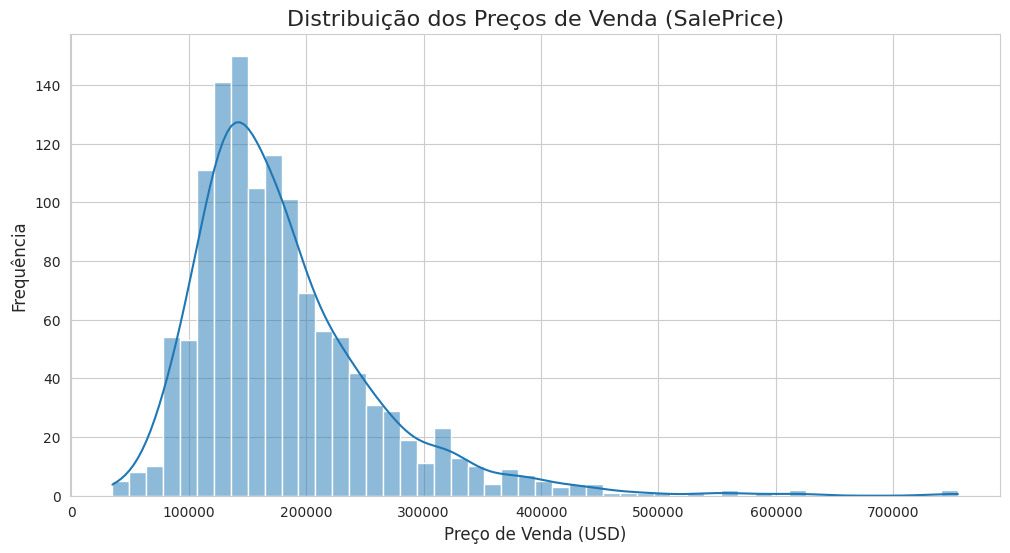

In [ ]:
# Investigando a distribuição da nossa variável alvo: 'SalePrice'
plt.figure(figsize=(12, 6))
sns.histplot(df_analise['SalePrice'], kde=True, bins=50)
plt.title('Distribuição dos Preços de Venda (SalePrice)', fontsize=16)
plt.xlabel('Preço de Venda (USD)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

In [ ]:
# **Primeiras Conclusões da Análise Exploratória:**
#
# * **Dados:** Temos 1259 registros de imóveis sem valores nulos para as colunas que selecionamos (`GrLivArea` e `SalePrice`).
# * **Estatísticas:** A área média (`GrLivArea`) é de aproximadamente 1507 pés quadrados, e o preço médio (`SalePrice`) é de cerca de $181.144
# * **Distribuição do Preço:** O histograma mostra que a variável `SalePrice` tem uma **assimetria à direita** (ou positiva).
#  Isso significa que a maioria dos imóveis se concentra em faixas de preço mais baixas, com alguns imóveis muito caros "puxando" a média para cima.

In [ ]:
# ### Passo 3: Visualização da Relação entre as Variáveis
#
# Antes de criar qualquer modelo, a etapa mais crucial é visualizar a relação entre a nossa variável explicativa (X) e a variável alvo (y).
# Um gráfico de dispersão é a ferramenta perfeita para isso.


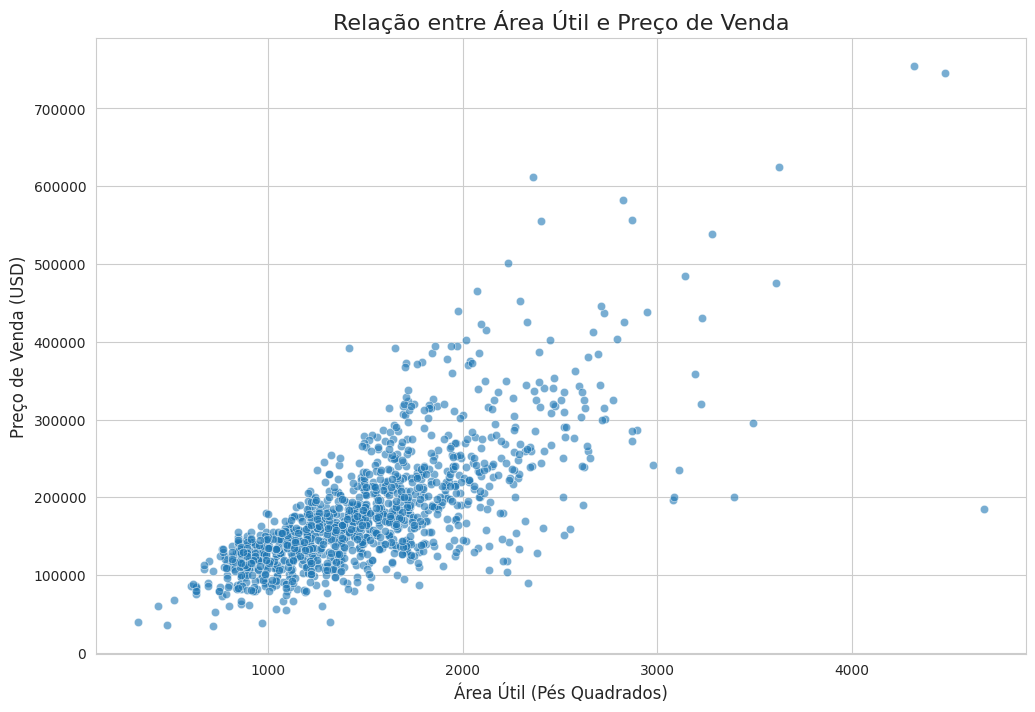

In [ ]:
# Criando um gráfico de dispersão para visualizar a relação entre a área e o preço
sns.scatterplot(data=df_analise, x='GrLivArea', y='SalePrice', alpha=0.6)
plt.title('Relação entre Área Útil e Preço de Venda', fontsize=16)
plt.xlabel('Área Útil (Pés Quadrados)', fontsize=12)
plt.ylabel('Preço de Venda (USD)', fontsize=12)
plt.show()

In [ ]:
# **Análise do Gráfico de Dispersão:**
#
# * Podemos observar uma clara **relação linear positiva**. À medida que a área (`GrLivArea`) aumenta, o preço (`SalePrice`) também tende a aumentar.
# * A "nuvem" de pontos parece seguir o padrão de uma linha reta, o que é um ótimo sinal para a aplicação da Regressão Linear.
# * Notamos também alguns outliers: casas com área muito grande que podem ou não seguir a tendência principal.

In [ ]:
#  Preparar os dados para o scikit-learn
# A biblioteca espera que X seja uma matriz 2D (ou DataFrame) e y seja uma série 1D.
X = df_analise[['GrLivArea']]
y = df_analise['SalePrice']

In [ ]:
# ### Passo 4: Construção e Treinamento do Modelo de Regressão

# Agora que confirmamos visualmente a relação linear, vamos quantificá-la.
# Ensinaremos o computador a encontrar a "melhor reta" que descreve essa relação.

In [ ]:
# Criar o objeto do modelo
# Este objeto é como uma "receita" de Regressão Linear em branco.
model = LinearRegression()
model

LinearRegression()

In [ ]:
# Treinar o modelo com os nossos dados
# O método .fit() é o "motor" que encontra os melhores valores para os coeficientes 'w' e 'b'.
model.fit(X, y)

print("Modelo de Regressão Linear treinado com sucesso!")
print(f"A equação da reta encontrada é: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

Modelo de Regressão Linear treinado com sucesso!
A equação da reta encontrada é: y = 115.03x + 7722.80


In [ ]:
# ### Passo 5: Interpretação e Avaliação do Modelo
#
# O modelo está treinado, mas o que os números que ele encontrou realmente significam?
# E quão bem ele se ajusta aos nossos dados?

In [ ]:
#  Extraindo e interpretando os coeficientes
b = model.intercept_
w = model.coef_[0]

In [ ]:
print(f"Intercepto (b): {b:.2f}")
print(f"Coeficiente (w): {w:.2f}")
print("-" * 50)
print("TRADUÇÃO DOS RESULTADOS:")
print(f"O intercepto (b) de ${b:.2f} representa o preço estimado de um imóvel com 0 pés quadrados de área. Muitas vezes, não tem uma interpretação prática direta, mas é o ponto de partida da nossa reta.")
print(f"O coeficiente (w) de ${w:.2f} é a informação mais valiosa: para cada pé quadrado a mais na área útil de um imóvel, nosso modelo prevê um aumento de aproximadamente ${w:.2f} no preço de venda.")


Intercepto (b): 7722.80
Coeficiente (w): 115.03
--------------------------------------------------
TRADUÇÃO DOS RESULTADOS:
O intercepto (b) de $7722.80 representa o preço estimado de um imóvel com 0 pés quadrados de área. Muitas vezes, não tem uma interpretação prática direta, mas é o ponto de partida da nossa reta.
O coeficiente (w) de $115.03 é a informação mais valiosa: para cada pé quadrado a mais na área útil de um imóvel, nosso modelo prevê um aumento de aproximadamente $115.03 no preço de venda.


In [ ]:
#  Avaliando a performance com o R-quadrado (R²)
r2 = model.score(X, y)
print("\n" + "-" * 50)
print(f"Coeficiente de Determinação (R-quadrado): {r2:.4f}")
print("TRADUÇÃO DA AVALIAÇÃO:")
print(f"O R² nos diz que aproximadamente {r2:.1%} da variação nos preços dos imóveis pode ser explicada pela variação na área útil. Os outros {(1-r2):.1%} são explicados por outros fatores que não incluímos no modelo (localização, número de quartos, etc.).")



--------------------------------------------------
Coeficiente de Determinação (R-quadrado): 0.5380
TRADUÇÃO DA AVALIAÇÃO:
O R² nos diz que aproximadamente 53.8% da variação nos preços dos imóveis pode ser explicada pela variação na área útil. Os outros 46.2% são explicados por outros fatores que não incluímos no modelo (localização, número de quartos, etc.).


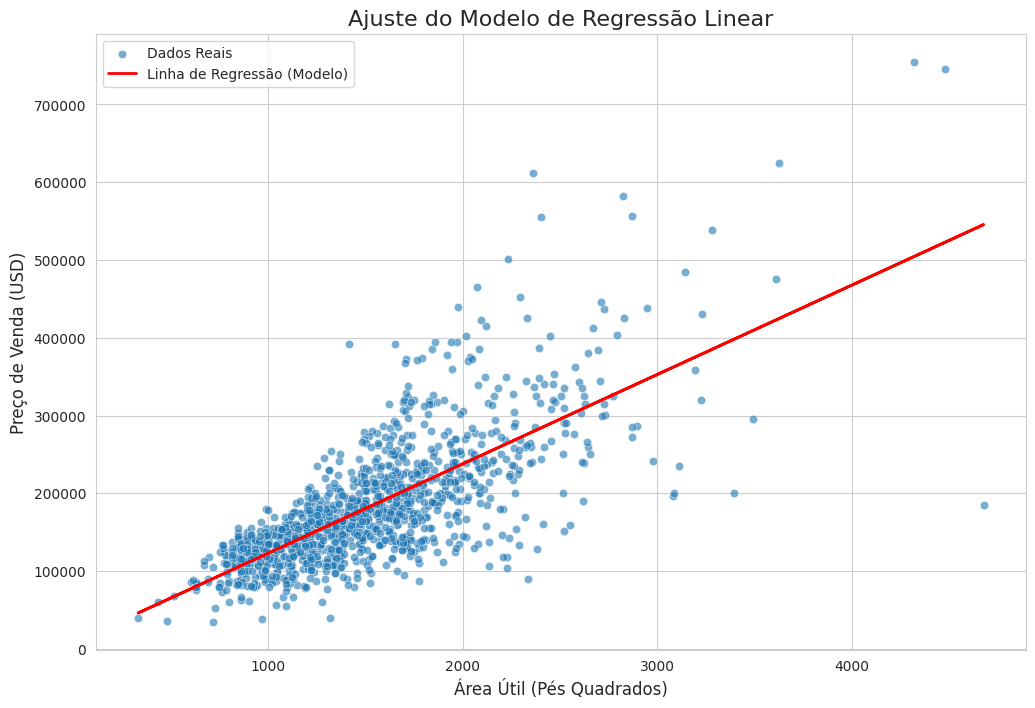

In [ ]:
#  Visualizando a reta de regressão
plt.figure(figsize=(12, 8))

# Gráfico de dispersão dos dados originais
sns.scatterplot(data=df_analise, x='GrLivArea', y='SalePrice', alpha=0.6, label='Dados Reais')

# Linha de regressão prevista pelo modelo
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linha de Regressão (Modelo)')
plt.title('Ajuste do Modelo de Regressão Linear', fontsize=16)
plt.xlabel('Área Útil (Pés Quadrados)', fontsize=12)
plt.ylabel('Preço de Venda (USD)', fontsize=12)
plt.legend()
plt.show()

In [ ]:
# ### Passo 6: Análise Crítica - Investigando os Erros (Resíduos)
#
# Um bom analista não confia cegamente no R². A etapa final e mais importante é analisar os **erros** do modelo. O erro (ou **resíduo**) é a diferença entre o preço real e o preço previsto pelo modelo para cada casa.
#
# Se o modelo é bom, os erros devem ser aleatórios, sem nenhum padrão.

In [ ]:
# Calculando os resíduos
previsoes = model.predict(X)
residuos = y - previsoes

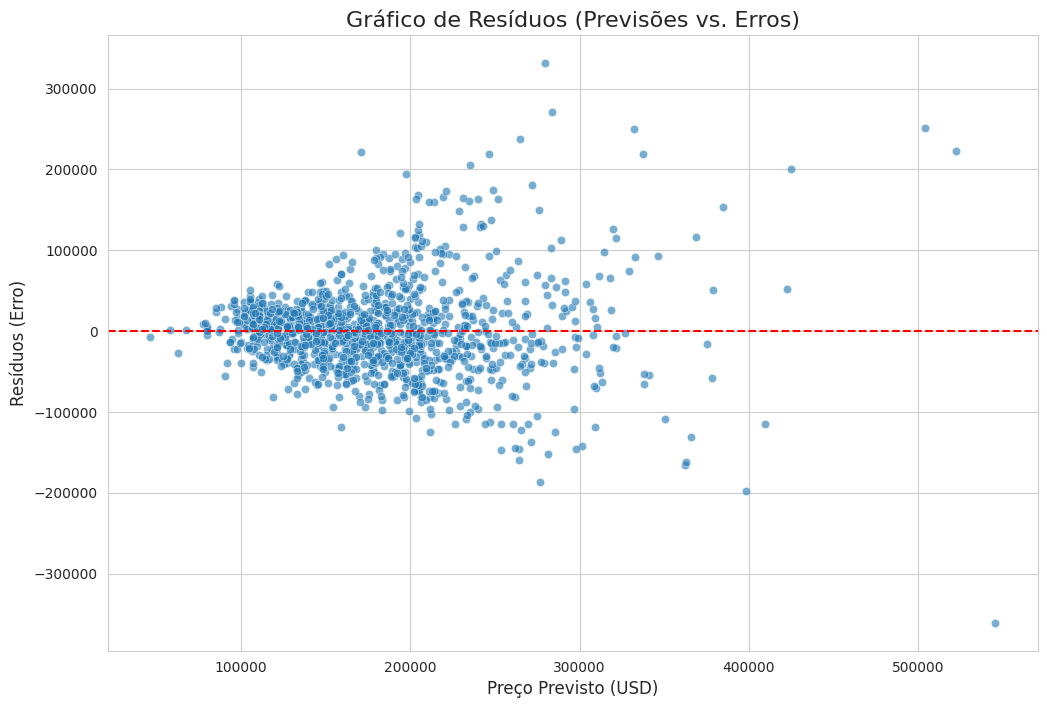

In [ ]:
# Criando um gráfico de resíduos
# No eixo X, colocamos as previsões; no eixo Y, os resíduos.
plt.figure(figsize=(12, 8))
sns.scatterplot(x=previsoes, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--') # Linha em y=0 para referência
plt.title('Gráfico de Resíduos (Previsões vs. Erros)', fontsize=16)
plt.xlabel('Preço Previsto (USD)', fontsize=12)
plt.ylabel('Resíduos (Erro)', fontsize=12)
plt.show()

In [ ]:
# **Interpretação do Gráfico de Resíduos:**
#
# * **O ideal:** um gráfico que se parece com um "céu estrelado", com os pontos distribuídos aleatoriamente em torno da linha vermelha (erro zero), sem formar padrões.
# * **O que vemos:** Notamos um padrão de **cone** (ou funil), conhecido como **heterocedasticidade**.
#         Os erros aumentam à medida que o preço previsto aumenta. Isso significa que nosso modelo é muito melhor em prever os preços de casas baratas do que de casas caras.
#
# **Conclusão Final:**
#
# A Regressão Linear Simples nos deu um modelo útil e interpretável que explica uma parte significativa da variação dos preços.
# No entanto, a análise de resíduos (um dos pontos fracos que vimos na teoria) nos mostra que o modelo tem limitações e pode ser aprimorado,
#                 talvez adicionando mais variáveis ao modelo (Regressão Múltipla).

In [ ]:
# # Próximo Passo: Regressão Linear Múltipla
#
# Vimos que nosso primeiro modelo, usando apenas a área (`GrLivArea`), foi útil, mas deixou a desejar (R² de ~50% e problemas nos resíduos). E se adicionarmos mais informações?
#
# Vamos incluir a variável **`OverallQual`** (Qualidade Geral do Material e Acabamento) e construir um modelo de **Regressão Linear Múltipla**.
#
# **Objetivo:** Verificar se, ao adicionar uma nova variável, conseguimos criar um modelo mais preciso e que explique melhor a variação dos preços.

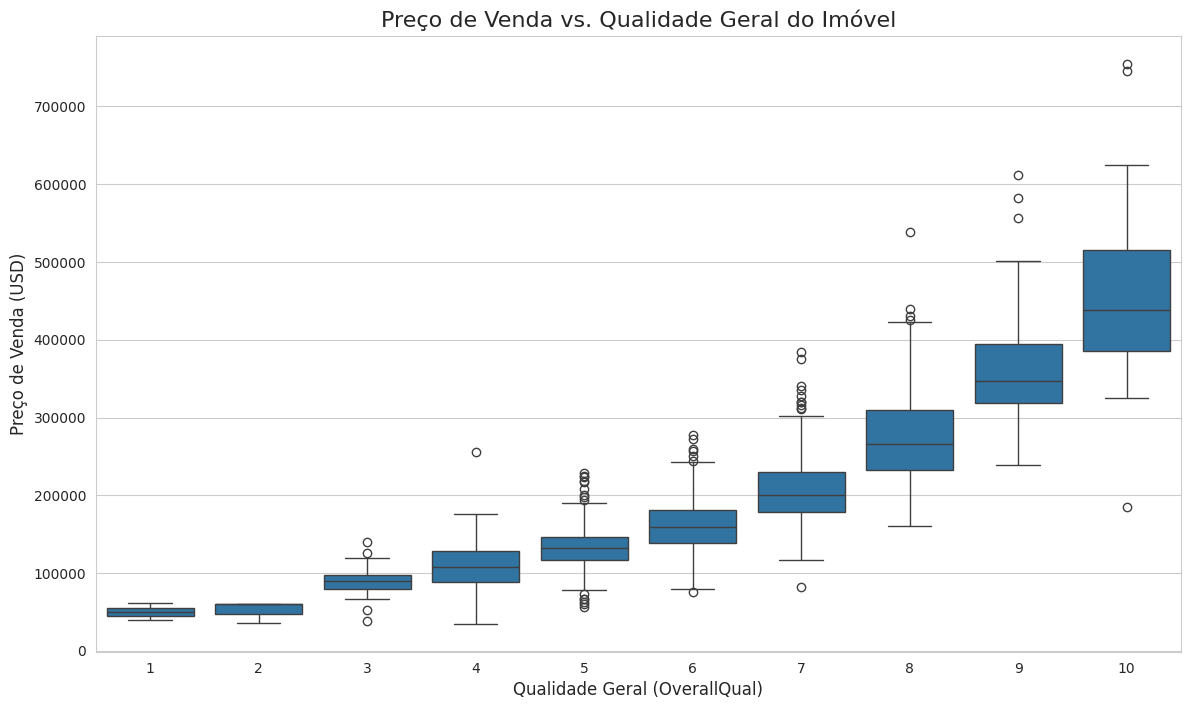

In [ ]:
# --- Passo 1: Análise Exploratória da Nova Variável ---

# A variável 'OverallQual' é numérica (de 1 a 10), mas representa categorias de qualidade.
# Um boxplot é a melhor forma de visualizar a relação entre uma variável categórica/ordinal e uma contínua (nosso preço).
# Vamos usar o DataFrame original que contém todas as colunas.

plt.figure(figsize=(14, 8))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('Preço de Venda vs. Qualidade Geral do Imóvel', fontsize=16)
plt.xlabel('Qualidade Geral (OverallQual)', fontsize=12)
plt.ylabel('Preço de Venda (USD)', fontsize=12)
plt.show()

In [ ]:
# **Análise do Boxplot:**
#
# * A relação é claríssima e muito forte! À medida que a nota da Qualidade Geral (`OverallQual`) aumenta, a mediana do Preço de Venda (`SalePrice`) aumenta de forma consistente.
# * Isso nos dá uma grande confiança de que `OverallQual` é uma variável explicativa poderosa para o preço dos imóveis.

In [ ]:
# ### Passo 2: Construindo o Modelo de Regressão Múltipla
#
# O processo é quase idêntico ao anterior. A única diferença é que agora nosso `X` terá duas colunas.

# %% [python]
# 1. Preparar os dados com as duas variáveis
X = df[['GrLivArea', 'OverallQual']]
y = df['SalePrice']

In [ ]:
# 2. Criar um NOVO objeto de modelo para a regressão múltipla
model_2 = LinearRegression()
model_2

LinearRegression()

In [ ]:
# 3. Treinar o novo modelo
model_2.fit(X,y)

print("Modelo de Regressão Múltipla treinado com sucesso!")

Modelo de Regressão Múltipla treinado com sucesso!


In [ ]:
# ### Passo 3: Interpretando o Modelo Múltiplo
#
# Agora temos dois coeficientes (`w`), um para cada variável. A interpretação muda um pouco e fica ainda mais interessante.
#
# A equação agora é: **Preço = (w1 * Área) + (w2 * Qualidade) + b**

In [ ]:
# Extraindo o intercepto e os DOIS coeficientes
b_2 = model_2.intercept_
w_area, w_qual = model_2.coef_

In [ ]:
print(f"Intercepto (b): {b_2:.2f}")
print(f"Coeficiente para GrLivArea (w1): {w_area:.2f}")
print(f"Coeficiente para OverallQual (w2): {w_qual:.2f}")
print("-" * 50)
print("TRADUÇÃO DOS RESULTADOS:")
print(f"1. Para cada pé quadrado a mais na área (`GrLivArea`), o modelo prevê um aumento de US$ {w_area:.2f} no preço, **mantendo a qualidade (`OverallQual`) constante.**")
print(f"2. Para cada ponto a mais na nota de qualidade (`OverallQual`), o modelo prevê um aumento de US$ {w_qual:.2f} no preço, **mantendo a área (`GrLivArea`) constante.**")

Intercepto (b): -109942.86
Coeficiente para GrLivArea (w1): 63.61
Coeficiente para OverallQual (w2): 31980.67
--------------------------------------------------
TRADUÇÃO DOS RESULTADOS:
1. Para cada pé quadrado a mais na área (`GrLivArea`), o modelo prevê um aumento de US$ 63.61 no preço, **mantendo a qualidade (`OverallQual`) constante.**
2. Para cada ponto a mais na nota de qualidade (`OverallQual`), o modelo prevê um aumento de US$ 31980.67 no preço, **mantendo a área (`GrLivArea`) constante.**


In [ ]:
# **Ponto-chave da Regressão Múltipla:**
#
# A interpretação de cada coeficiente agora leva em conta o fato de que as outras variáveis estão "travadas" ou mantidas constantes.
# Isso nos permite isolar o impacto de cada característica no preço.

In [ ]:
# ### Passo 4: Comparando a Performance
#
# Nosso novo modelo é melhor que o primeiro? Vamos comparar o R-quadrado.

In [ ]:
# Calculando o R² do novo modelo
r2_multi = model_2.score(X, y)

# Vamos buscar o R² do modelo antigo para comparar
# r2_antigo = model.score(X, y) # Relembrando o X do primeiro modelo

In [ ]:

print(f"R-quadrado do Modelo Simples (só com Área): {r2:.4f}")
print(f"R-quadrado do Modelo Múltiplo (com Área e Qualidade): {r2_multi:.4f}")
print("-" * 50)
print("AVALIAÇÃO DA MELHORA:")
print(f"Nosso R² saltou de {r2:.1%} para {r2_multi:.1%}!")
print("Isso é um avanço enorme. O novo modelo, combinando área e qualidade, consegue explicar uma porção muito maior da variação nos preços das casas.")

R-quadrado do Modelo Simples (só com Área): 0.5380
R-quadrado do Modelo Múltiplo (com Área e Qualidade): 0.7310
--------------------------------------------------
AVALIAÇÃO DA MELHORA:
Nosso R² saltou de 53.8% para 73.1%!
Isso é um avanço enorme. O novo modelo, combinando área e qualidade, consegue explicar uma porção muito maior da variação nos preços das casas.


In [ ]:
# Calculando os resíduos do novo modelo
previsoes_multi = model_2.predict(X)
residuos_multi = y - previsoes_multi

In [ ]:
# ### Passo 5: Análise Crítica dos Resíduos (de novo!)
#
# O modelo ficou mais preciso, mas será que resolvemos o problema do "cone" (heterocedasticidade) que vimos antes?


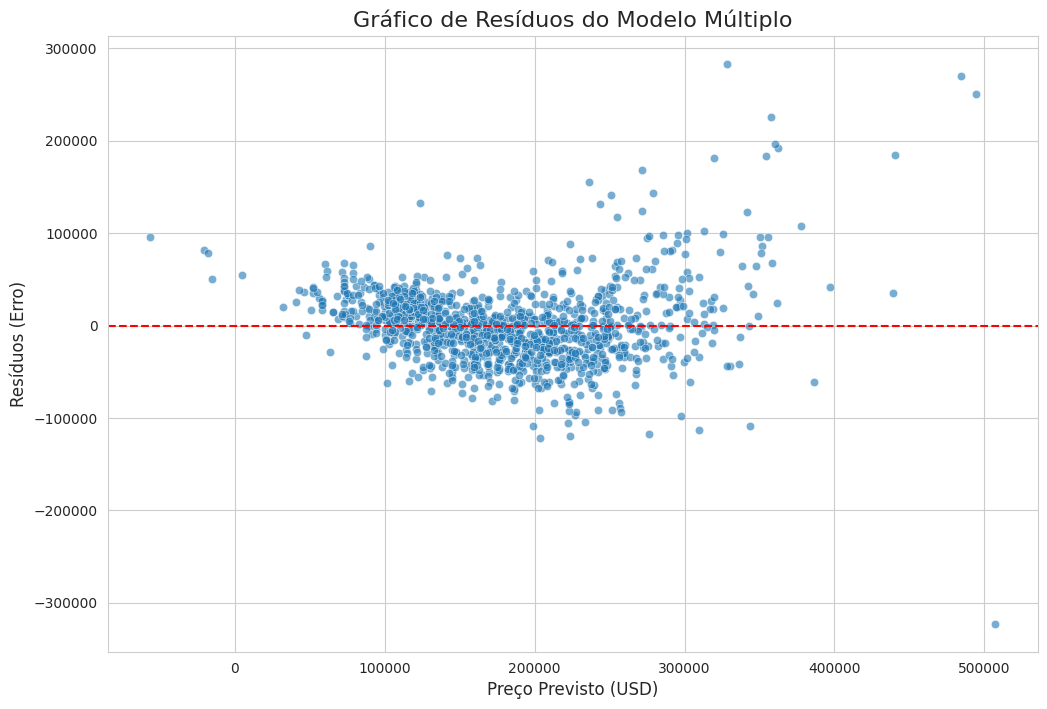

In [ ]:
# Criando o gráfico de resíduos para o modelo múltiplo
plt.figure(figsize=(12, 8))
sns.scatterplot(x=previsoes_multi, y=residuos_multi, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos do Modelo Múltiplo', fontsize=16)
plt.xlabel('Preço Previsto (USD)', fontsize=12)
plt.ylabel('Resíduos (Erro)', fontsize=12)
plt.show()

In [ ]:
# **Análise Final:**
#
# * O modelo de Regressão Múltipla é **significativamente mais preciso** que o modelo simples, como provado pelo grande aumento no R².
# * No entanto, o gráfico de resíduos ainda mostra um padrão de **cone**.
#     Melhoramos a precisão, mas a **confiabilidade** do modelo ainda não é a mesma para todas as faixas de preço.
#       Ele continua sendo melhor para prever preços de casas baratas.
#
# **Conclusão:**
# Adicionar variáveis relevantes torna o modelo mais poderoso.
# A análise de resíduos continua sendo a ferramenta mais importante para entender as fraquezas que ainda persistem e guiar os próximos passos.